In [101]:
import numpy as np

def create_min_heap(h: np.ndarray):
  j = 1
  while j < len(h):
    i = len(h) - 1
    while i > 0:
      if h[i] < h[(i - 1) // 2]:
        aux = h[i]
        h[i] = h[(i - 1) // 2]
        h[(i - 1) // 2] = aux
        i = (i - 1) // 2
      else:
        i = i - 1
    j +=1

In [102]:
import numpy as np
import sys
import time
import random

l_timings = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    timings = %timeit -n 100 -r 10 -o -q create_min_heap(t)
    l_timings.append([len(h), timings.best])
a_timings = np.array(l_timings)
print(a_timings)



[[0.00000000e+00 1.28300046e-06]
 [0.00000000e+00 9.20100021e-06]
 [0.00000000e+00 4.47960000e-05]
 [0.00000000e+00 2.10630000e-04]
 [0.00000000e+00 1.12531500e-03]
 [0.00000000e+00 5.77214600e-03]
 [0.00000000e+00 3.32208980e-02]
 [0.00000000e+00 1.96024733e-01]
 [0.00000000e+00 1.35083982e+00]
 [0.00000000e+00 5.61483406e+00]]


In [103]:
from scipy.optimize import curve_fit

def tofit(x, a, b) :
    return a * (x) +b
l_timings=np.array(l_timings)
x = l_timings[: , 0]
y = np.array(l_timings) [: , 1]
y = y/ y[0]

pars,_ = curve_fit(tofit, x, y)

c:\Users\gabri\miniconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


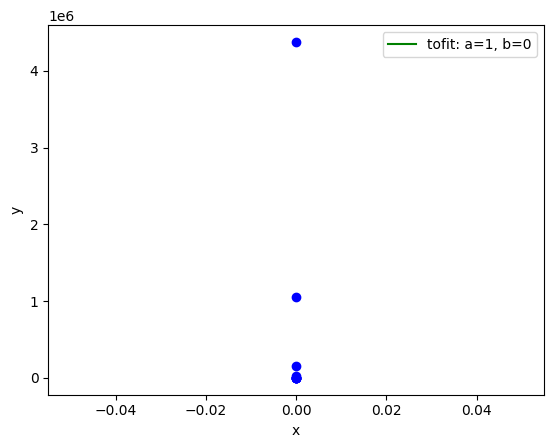

In [104]:
import matplotlib.pyplot as plt

plt.plot(x, tofit(x,*pars), 'g-', label='tofit: a=1, b=0')
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()